### Quick Implementation and Tuning

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv('data.csv')
del data['Unnamed: 32']

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
data['diagnosis'].value_counts() 

B    357
M    212
Name: diagnosis, dtype: int64

### Remember keras only accepts arrays

In [66]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

### Encoding, Splitting and Scaling

In [67]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [68]:
# Encoding
# 1 is Malignant 0 is Benign
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [69]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
# Scaling
# fir transform the train and only transform the test
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Keras Modelling

In [71]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import TensorBoard

In [72]:
classifier = Sequential()
classifier.add(Dense(16, input_shape=(X_train.shape[1], ), activation = "relu"))
#classifier.add(Dropout(0.1))
classifier.add(Dense(16, activation = "relu"))
#classifier.add(Dropout(0.1))
classifier.add(Dense(1, activation="sigmoid"))

In [73]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [74]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
classifier.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), verbose = 1)

Train on 455 samples, validate on 114 samples
Epoch 1/50
455/455 [==============================] - 1s 1ms/step - loss: 0.6846 - acc: 0.5692 - val_loss: 0.6335 - val_acc: 0.5965
Epoch 2/50
455/455 [==============================] - 0s 84us/step - loss: 0.5183 - acc: 0.6330 - val_loss: 0.5149 - val_acc: 0.6140
Epoch 3/50
455/455 [==============================] - 0s 83us/step - loss: 0.4278 - acc: 0.6681 - val_loss: 0.4422 - val_acc: 0.6667
Epoch 4/50
455/455 [==============================] - 0s 84us/step - loss: 0.3689 - acc: 0.7802 - val_loss: 0.3925 - val_acc: 0.8246
Epoch 5/50
455/455 [==============================] - 0s 81us/step - loss: 0.3244 - acc: 0.9033 - val_loss: 0.3500 - val_acc: 0.9123
Epoch 6/50
455/455 [==============================] - 0s 83us/step - loss: 0.2842 - acc: 0.9385 - val_loss: 0.3071 - val_acc: 0.9123
Epoch 7/50
455/455 [==============================] - 0s 78us/step - loss: 0.2450 - acc: 0.9495 - val_loss: 0.2666 - val_acc: 0.9298
Epoch 8/50
455/455 [====

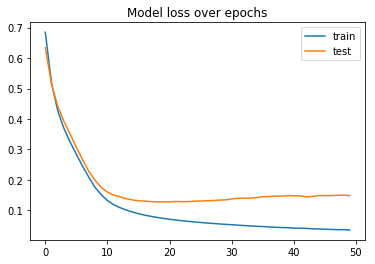

In [78]:
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper right')
plt.title('Model loss over epochs')
plt.show()

### Confusion Matrix

In [79]:
from sklearn.metrics import confusion_matrix

In [82]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [88]:
cm = confusion_matrix(y_pred, y_test)

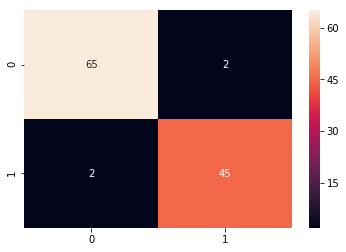

In [90]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.show()

In [96]:
print(f"precision is: {cm[0][0] / (cm[0][0] + cm[0][1])}")
print(f"recall is: {cm[0][0] / (cm[0][0] + cm[1][0])}")
print(f"accuracy is: {(cm[0][0] + cm[1][1]) / 114}")

precision is: 0.9701492537313433
recall is: 0.9701492537313433
accuracy is: 0.9649122807017544


In [107]:
from sklearn import metrics
y_pred = classifier.predict(X_test)
fpr, tpr, thres = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

0.9831692600825659